3.709523809523801 0.8486684247915056
0.006119047619047628 0.0005455447255899809
0.3535533905932738


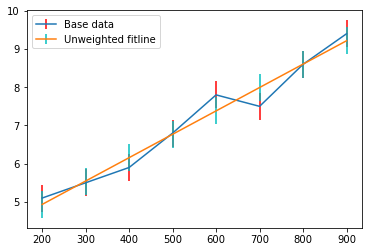

In [115]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

#unweighted info
y = np.array([5.1, 5.5, 5.9, 6.8, 7.8, 7.5, 8.6, 9.4])
x = np.linspace(200,900,8)
g = 9.8
delta = 8* np.sum(x**2) - np.sum(x)**2
a_numerator = (np.sum(x**2)) * np.sum(y) - (np.sum(x) * np.sum(x*y))
b_numerator = 8 * np.sum(x*y) - np.sum(x) * np.sum(y)

#calculate a and b
a = a_numerator / delta
b = b_numerator / delta

#calculate uncertainty
uncertainty_y = np.sqrt(1/8-2 * np.sum(y-(a+b*x))**2) 
unc_a = uncertainty_y * np.sqrt(np.sum(x)**2 / delta)
unc_b = uncertainty_y * np.sqrt(8/delta)
#calculate residual
residual = y - (a + b*x)
#function for fit line unweighted
def fitline(x,a,b):
    return a+(b*x)
#print values for questions
print(a, unc_a)
print(b, unc_b)
print(uncertainty_y)
plt.errorbar(x,y, yerr=uncertainty_y, ecolor='r', label='Base data')
x_fit = fitline(x,a,b)
plt.errorbar(x,x_fit, yerr=uncertainty_y, ecolor='c', label='Unweighted fitline')
plt.legend()

<ErrorbarContainer object of 3 artists>

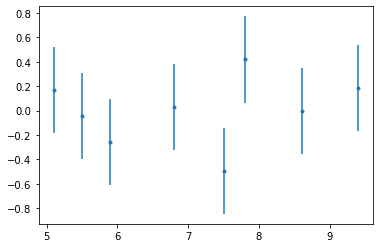

In [116]:
plt.errorbar(y, residual, yerr=uncertainty_y, fmt='.')

In [117]:
#calculate chi squared unweighted
chi_num = y-x_fit
chi_sq = np.sum(chi_num ** 2 / uncertainty_y ** 2)
1/6 * chi_sq

0.7320634920634914

3.8220758637787537 0.28686476944650585
0.005974482706169559 0.0005988224717121979


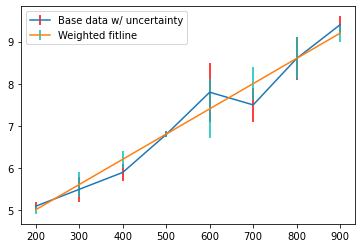

In [118]:
unc_l = np.array([.1, .3, .2, .07, .7, .4, .5, .2])
#create weight array
w = np.array([1/.1 **2, 1/.3 ** 2, 1/.2**2, 1/.07 ** 2, 1/.7 **2,1/.4 **2,
              1/.5 **2, 1/.2**2])
#calculate a and uncertainty
a_num = np.sum(w * x**2) * np.sum(w * y) - np.sum(w * x) * np.sum(w * x * y)
a_den = np.sum(w) * np.sum(w * x**2) - (np.sum(w * x)) **2
a_weighted = a_num/a_den
unc_weight_a = np.sqrt(np.sum((x **2) * w)/(np.sum(w) * np.sum(x **2) - np.sum(x) ** 2))
print(a_weighted , unc_weight_a)

#calculate b and uncertainty
b_num = np.sum(w) * np.sum(w * x * y) - np.sum(w*x) * np.sum(w*y)
b_den = np.sum(w) * np.sum(w * x**2) - np.sum(w * x) **2
b_weighted = b_num/ b_den
unc_weight_b = np.sqrt(np.sum(w)/ (np.sum(w) * np.sum(x **2) - np.sum(x) **2))
print(b_weighted, unc_weight_b)

#weighted fitline
weighted_x_fit = fitline(x, a_weighted, b_weighted)
#plot code
plt.errorbar(x, y, yerr=unc_l, ecolor='r', label='Base data w/ uncertainty')
plt.errorbar(x, weighted_x_fit, ecolor='c', yerr=unc_l, label='Weighted fitline')
plt.legend()
plt.show()

<ErrorbarContainer object of 3 artists>

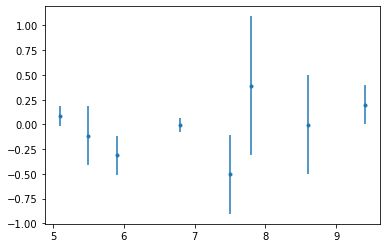

In [119]:
#calculate residuals and plot
residual = y - weighted_x_fit
plt.errorbar(y, residual, yerr=unc_l, fmt='.')

In [120]:
#calculate chi squared weighted
chi_num_weighted = y-weighted_x_fit
chi_sq_weighted = np.sum((chi_num_weighted / unc_l)**2)
1/6 * chi_sq_weighted

1.0329252322458873

In [225]:
#code for the exponential graph
#variable arrays
t = np.array([10,20,30,40,50]) #minutes
nu = np.array([409, 304, 260, 192, 170])
nu_log = np.log(nu)
unc_nu = np.sqrt(nu)
weight = 1/((unc_nu/nu) **2)
delta = np.sum(weight) * np.sum(weight * t**2)-(np.sum(weight * t))**2
print('uncertainty in nu', unc_nu)

#calculate a values and b values
nu_a_num = np.sum(weight * t **2)*np.sum(weight *nu_log) - np.sum(weight * t)*np.sum(weight * nu_log * t)
nu_a_den = delta
a_nu = np.exp(nu_a_num/nu_a_den)
a_nu_unc = np.sqrt(np.sum(weight * t**2)/delta)
print('a value', a_nu)

tau_b_num = np.sum(weight) * np.sum(weight*t * nu_log)- np.sum(weight*t) * np.sum(weight*nu_log)
tau_b_den = delta
tau_b = (tau_b_num/tau_b_den)
tau_b_unc = np.sqrt(np.sum(weight)/delta)
print('b value', tau_b)
print('unc in b',tau_b_unc,'unc in a', np.exp(a_nu_unc))

uncertainty in nu [20.22374842 17.43559577 16.1245155  13.85640646 13.03840481]
a value 499.91625511856
b value -0.022559010365795617
unc in b 0.0019798095345782943 unc in a 1.0592560199071692


<ErrorbarContainer object of 3 artists>

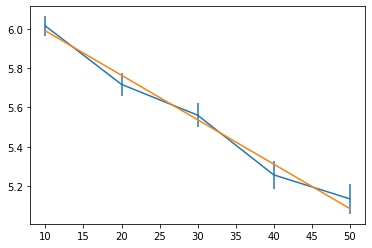

In [219]:
def exponential_fit(x,a,b):
    return np.log(a)+b*x

plt.errorbar(t,nu_log, yerr=(unc_nu/nu))
plt.errorbar(t, exponential_fit(t, a_nu, tau_b))

<ErrorbarContainer object of 3 artists>

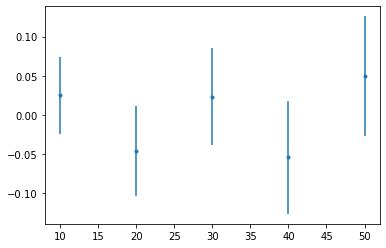

In [220]:
plt.errorbar(t, nu_log - exponential_fit(t, a_nu, tau_b), yerr=(unc_nu/nu),fmt='.')

In [226]:
y_predict = exponential_fit(t,a_nu, tau_b)
chi_squared_exp = (1/3) * np.sum(((nu_log - y_predict)**2)/((unc_nu/nu) **2))
chi_squared_exp

0.6752388515870151

a and b vals [4.49312958e+02 3.55585615e-02 9.18525087e+01]
error in a and b [3.44432913e+01 1.27726237e-02 5.72373737e+01]


C:\Users\cbhof\AppData\Local\Temp\ipykernel_8124\2717006820.py:4: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


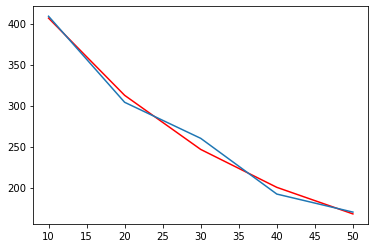

In [222]:
import scipy
from scipy.optimize import curve_fit
def func(x,a,b,c):
    return a * np.exp(-b * x) + c

y = func(t, a_nu, tau_b, 0)
popt, pcov = curve_fit(func, t, nu, sigma=(unc_nu))
popt
plt.plot(t, func(t, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(t,nu)
perr = np.sqrt(np.diag(pcov))
print('a and b vals', popt)
print('error in a and b',perr)

<ErrorbarContainer object of 3 artists>

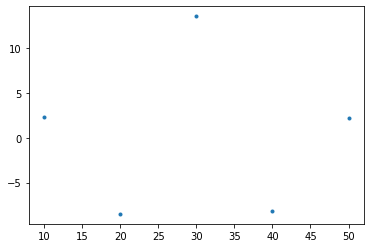

In [223]:
#residuals of curve_fit
plt.errorbar(t,nu - func(t, *popt), fmt='.')

In [224]:
chi_sq_nu = (1/3) * np.sum((nu - func(t, *popt))**2/((unc_nu)**2))
chi_sq_nu

0.4445479037039881